# Let's Build a Model!

## Import Our Data

[California Housing Data Set](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

/Users/nicholascifuentes-goodbody/anaconda3/envs/wq3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/nicholascifuentes-goodbody/anaconda3/envs/wq3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/nicholascifuentes-goodbody/anaconda3/envs/wq3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/nicholascifuentes-goodbody/anaconda3/envs/wq3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kw

In [5]:
data = fetch_california_housing()

In [6]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [7]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [8]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y = data['target']

# EDA

In [10]:
import matplotlib.pyplot as plt

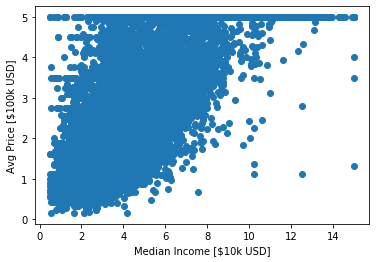

In [11]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income [$10k USD]')
plt.ylabel('Avg Price [$100k USD]')
plt.show()

# Let's Build a Linear Model with One Feature

In [12]:
from sklearn.linear_model import LinearRegression

/Users/nicholascifuentes-goodbody/anaconda3/envs/wq3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
print(X['MedInc'].to_frame().shape)
print(y.shape)

(20640, 1)
(20640,)


In [14]:
# Instantiate you PREDICTOR
lr = LinearRegression()
# Fit your PREDICTOR
lr.fit(X['MedInc'].to_frame(), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('beta_0', lr.intercept_)
print('beta_1', lr.coef_)

beta_0 0.4508557670326787
beta_1 [0.41793849]


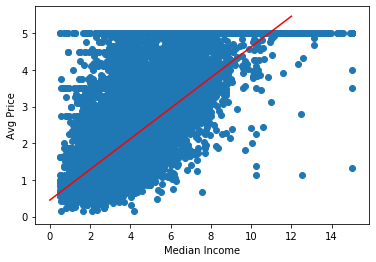

In [16]:
import numpy as np

x_line = np.arange(0,13).reshape(-1,1)
# STEP 3: Use your PREDICTOR to predict
y_line = lr.predict(x_line)
plt.plot(x_line, y_line, color='r')

plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('Avg Price')
plt.show();

# Linear Model with All Features

In [17]:
# STEP 1: Instantiate
lr2 = LinearRegression()

# STEP 2: Fit / train the predictor
lr2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('beta_0:', lr2.intercept_)
print('other betas:', lr2.coef_)

beta_0: -36.94192020718438
other betas: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [19]:
print('Median Housing Price =')
print(lr2.intercept_, '+')
for b, f in zip(lr2.coef_, data['feature_names']):
    print(b, 'x', f, '+')

Median Housing Price =
-36.94192020718438 +
0.43669329313432476 x MedInc +
0.009435778033238256 x HouseAge +
-0.107322041390904 x AveRooms +
0.6450656935198135 x AveBedrms +
-3.976389421256679e-06 x Population +
-0.0037865426549709836 x AveOccup +
-0.4213143775271436 x Latitude +
-0.43451375467477754 x Longitude +


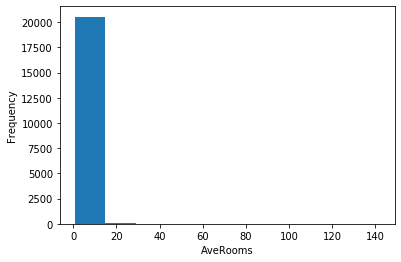

In [20]:
X['AveRooms'].plot(kind='hist')
plt.xlabel('AveRooms');

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss = StandardScaler()
X_t = ss.fit_transform(X)

In [23]:
X_t = pd.DataFrame(X_t, columns=data['feature_names'])
X_t.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [24]:
X.describe().loc['mean':'std']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532


In [25]:
X_t.describe().loc['mean':'std']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00


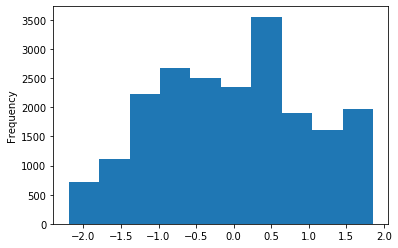

In [26]:
X_t['HouseAge'].plot(kind='hist')

In [27]:
lr3 = LinearRegression()
lr3.fit(X_t, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('Median Housing Price =')
print(lr3.intercept_, '+')
for b, f in zip(lr3.coef_, data['feature_names']):
    print(np.round(b, 3), 'x', f, '+')

Median Housing Price =
2.0685581690891386 +
0.83 x MedInc +
0.119 x HouseAge +
-0.266 x AveRooms +
0.306 x AveBedrms +
-0.005 x Population +
-0.039 x AveOccup +
-0.9 x Latitude +
-0.871 x Longitude +


# Pipelines

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
model = Pipeline([
    ('transformer', StandardScaler()),
    ('predictor', LinearRegression())
])

In [31]:
model.fit(X, y);

In [32]:
for c in model.named_steps['predictor'].coef_:
    print(c)

0.8296193042804506
0.11875165121214215
-0.2655268795066207
0.3056962298043089
-0.004503001312613669
-0.039326266978148686
-0.8998856544145069
-0.8705410023357304


# Custom Transformer

We want to create two new features for our data set: 

- Within 10 miles of Los Angeles (`1=yes`, `0=no`)
- Within 10 miles of San Francisco (`1=yes`, `0=no`)

In [33]:
X.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [1]:
from sklearn.base import BaseEstimator, TransformerMixin

In [49]:
X_test = np.array([34.05, -118.24, 34.05, -118.24, 34.05, -118.24]).reshape(-1,2)

In [101]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

class NearCity(BaseEstimator, TransformerMixin):
    def __init__(self, distance=10):
        self.la = (34.05, -118.24)
        self.sf = (37.77, -122.41)
        self.dis = distance
        
    def calc_dist(self, coords_1, coords_2):
        coords_1 = [radians(_) for _ in coords_1]
        coords_2 = [radians(_) for _ in coords_2]
        result = haversine_distances([coords_1, coords_2])[0,-1]
        return result * 6_371
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        dist_to_sf = np.apply_along_axis(self.calc_dist, 1, 
                                         X, coords_2=self.sf)
        dist_to_sf = 1*(dist_to_sf < self.dis)
        
        dist_to_la = np.apply_along_axis(self.calc_dist, 1, 
                                         X, coords_2=self.la)
        dist_to_la = 1*(dist_to_la < self.dis)
        
        X_trans = np.column_stack((X, dist_to_sf, dist_to_la))
        return X_trans

array([[  34.05, -118.24,    0.  ,    1.  ],
       [  34.05, -118.24,    0.  ,    1.  ],
       [  34.05, -118.24,    0.  ,    1.  ]])